### Load Data
- preprocess for neuralforecast

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = 'C:/users/elena/desktop/SodamteoAI/CropPricePrediction'

data_df = pd.read_csv(os.path.join(BASE_DIR, 'Rice_Price_data.csv'))

neural_df = data_df.melt(id_vars=['date'], var_name='unique_id', value_name='y')
neural_df = neural_df.rename(columns={'date': 'ds'})
neural_df['ds'] = pd.to_datetime(neural_df['ds'])

neural_df.head()

,ds,unique_id,y
0,1996-01-31,temperature,-0.9
1,1996-02-29,temperature,-0.7
2,1996-03-31,temperature,4.6
3,1996-04-30,temperature,10.0
4,1996-05-31,temperature,16.8


### Predict with Saved Model

Seed set to 1
c:\Users\elena\anaconda3\envs\sodamteo_ai\lib\site-packages\utilsforecast\processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 23.26it/s]

c:\Users\elena\anaconda3\envs\sodamteo_ai\lib\site-packages\neuralforecast\core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
c:\Users\elena\anaconda3\envs\sodamteo_ai\lib\site-packages\utilsforecast\processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\elena\anaconda3\envs\sodamteo_ai\lib\site-packages\utilsforecast\processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 100.01it/s]


c:\Users\elena\anaconda3\envs\sodamteo_ai\lib\site-packages\neuralforecast\core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


[49740.8203125, 49684.42578125, 49725.61328125]

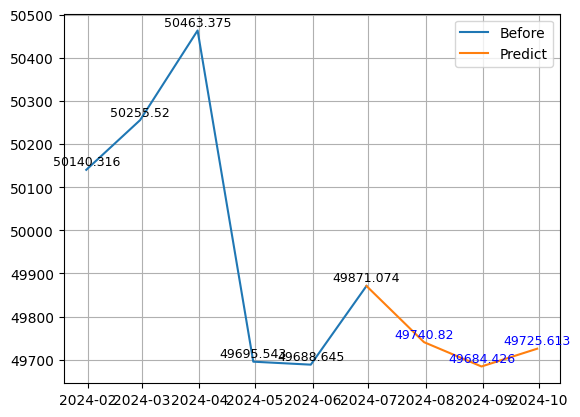

In [2]:
from neuralforecast import NeuralForecast
import datetime

horizon = 3

saved_model = NeuralForecast.load(os.path.join(BASE_DIR, 'ckpt'))
predict_insample = saved_model.predict_insample(step_size=horizon).reset_index()

before = predict_insample[predict_insample['ds'] >= datetime.datetime(2024, 1, 1)]
before = before[before['unique_id']=='price'][['ds', 'NHITS']]

predict = saved_model.predict().reset_index()
predict = predict[predict['unique_id']=='price'][['ds', 'NHITS']]
predict = pd.concat([before, predict])
predict.reset_index(drop=True, inplace=True)

plt.plot(predict[predict['ds']<=datetime.datetime(2024, 7, 1)]['ds'], predict[predict['ds']<=datetime.datetime(2024, 7, 1)]['NHITS'], label='Before')
plt.plot(predict[predict['ds']>=datetime.datetime(2024, 6, 1)]['ds'], predict[predict['ds']>=datetime.datetime(2024, 6, 1)]['NHITS'], label='Predict')
for i in range(len(predict)):
    if i<len(predict)-3:
        plt.text(predict['ds'][i], predict['NHITS'][i]+10, predict['NHITS'][i], fontsize=9, ha='center')
    else:
        plt.text(predict['ds'][i], predict['NHITS'][i]+10, predict['NHITS'][i], fontsize=9, ha='center', color='b')
plt.grid()
plt.legend()

predict[-3:]['NHITS'].to_list()